<a href="https://colab.research.google.com/github/mohmadAyman75/Face-classification/blob/main/Inception_Net_100_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/"


'Colab Notebooks'			   'train - Copy.zip'
'my data'				    train.zip
 Shouk_model_50x50.keras		    val-20251212T224639Z-1-001.zip
 Shouk_model_V2_c100_s50.h5		    vggface_train_100x50.csv
 Shouk_model_V2_c100_s50.keras		    vggface_train_150x50.csv
 Shouk_model_V2_c150_s50.keras		    vggface_train_50x50.csv
'Task DM.zip'				   '‏مستند من Shouk'
'train-20251212T212831Z-1-001 - Copy.zip'  '‏مستند من Shouk.pdf'


In [ ]:

!unzip "/content/drive/MyDrive/val-20251212T224639Z-1-001.zip" -d /content/data2




Streaming output truncated to the last 5000 lines.
  inflating: /content/data2/val/n000659/0027_01.jpg  
  inflating: /content/data2/val/n000659/0127_02.jpg  
  inflating: /content/data2/val/n000527/0072_01.jpg  
  inflating: /content/data2/val/n000659/0125_01.jpg  
  inflating: /content/data2/val/n000527/0011_01.jpg  
  inflating: /content/data2/val/n000659/0042_01.jpg  
  inflating: /content/data2/val/n000659/0131_01.jpg  
  inflating: /content/data2/val/n000659/0087_03.jpg  
  inflating: /content/data2/val/n000527/0005_02.jpg  
  inflating: /content/data2/val/n000527/0068_01.jpg  
  inflating: /content/data2/val/n000659/0099_01.jpg  
  inflating: /content/data2/val/n000659/0092_01.jpg  
  inflating: /content/data2/val/n000527/0017_01.jpg  
  inflating: /content/data2/val/n000527/0038_02.jpg  
  inflating: /content/data2/val/n000527/0004_01.jpg  
  inflating: /content/data2/val/n000527/0019_02.jpg  
  inflating: /content/data2/val/n000527/0067_02.jpg  
  inflating: /content/data2/val

In [ ]:
"""from google.colab import files

uploaded = files.upload()  # هيفتحلك نافذة تختار الملف من جهازك
"""

In [ ]:
"""import zipfile

for zip_name in uploaded.keys():
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall("/content")
        """

In [ ]:
zip_path = "/content/drive/MyDrive/train.zip"
extract_dir = "/content/data2/train"

In [ ]:
import zipfile
import os

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


print(os.listdir(extract_dir))


['train']


In [ ]:
import os

print(os.listdir("/content"))

['.config', 'drive', 'data2', 'sample_data']


In [ ]:
!ls /content

data2  drive  sample_data


In [ ]:
train_path_data = "/content/train"


In [ ]:
"""import os
print(os.listdir("/content/train"))
"""

In [ ]:
import os
print(os.listdir("/content"))


['.config', 'drive', 'data2', 'sample_data']


In [ ]:
for root, dirs, files in os.walk("/content"):
    if 'val' in dirs:
        print("Found val at:", os.path.join(root, 'val'))


Found val at: /content/data2/val


In [ ]:
"""
!unzip "/content/my data/train.zip" -d "/content/MyData/train"
"""

'\n!unzip "/content/my data/train.zip" -d "/content/MyData/train"\n'

In [ ]:
"""
!unzip "/content/drive/MyDrive/my data/train.zip/1Mohmad-Ayman-Suleiman.zip" -d /content/drive/MyDrive/Final_data/train/
"""

unzip:  cannot find or open /content/drive/MyDrive/my data/train.zip/1Mohmad-Ayman-Suleiman.zip, /content/drive/MyDrive/my data/train.zip/1Mohmad-Ayman-Suleiman.zip.zip or /content/drive/MyDrive/my data/train.zip/1Mohmad-Ayman-Suleiman.zip.ZIP.


In [ ]:
"""import zipfile
zip_path = "/content/data2/data2/val.zip"

# المجلد اللي هيتم فك الضغط فيه
extract_dir = "/content/data2/val"

# فك الضغط
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# دلوقتي pass المجلد بعد فك الضغط
path_data = extract_dir"""

In [ ]:
train_path_data = "/content/train"
val_path_data   = "/content/data2/val"


In [ ]:
import zipfile


with zipfile.ZipFile("/content/drive/MyDrive/train.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data2/train")


with zipfile.ZipFile("/content/drive/MyDrive/val-20251212T224639Z-1-001.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data2/val")

In [ ]:
train_path_data = "/content/data2/train"
val_path_data   = "/content/data2/val"

import os
print("Train folders:", os.listdir(train_path_data)[:10])
print("Val folders:", os.listdir(val_path_data)[:10])

Train folders: ['train']
Val folders: ['n000363', 'n001021', 'n000854', 'n000912', 'n000596', 'n000945', 'n000836', 'n000148', 'n000452', 'n000785']


In [ ]:
"""
import os

print("Train folders:", os.listdir(train_path_data)[:10])
print("Val folders:", os.listdir(val_path_data)[:10])
"""

Train folders: ['train']
Val folders: ['n000774', 'n001291', 'n000838', 'n000706', 'n000149', 'n000659', 'n001125', 'n001153', 'n000958', 'n000410']


In [ ]:
"""
import os
print(os.listdir(train_path_data))
print(os.listdir(val_path_data))
"""

In [ ]:
"""
train_path_data = r"/content/drive/MyDrive/Final_data/train"
val_path_data   = fr"/content/drive/MyDrive/Final_data/val"
"""

In [ ]:
"""import os
import re

path = "/content/drive/MyDrive/Final_data/train"
files = os.listdir(path)

def natural_key(text):
    return [int(c) if c.isdigit() else c for c in re.split(r'(\d+)', text)]

files_sorted = sorted(files, key=natural_key)

print(files_sorted)
"""

In [ ]:
import os
import re
import pandas as pd

def natural_sort_key(text):
    """Sort strings in human/natural order (numbers in order)."""
    return [int(c) if c.isdigit() else c for c in re.split(r'(\d+)', text)]

def generate_vggface_df(dir, limit_per_class=None):
    image_path = []
    image_label = []

    # Each folder inside dir is a label
    for label in sorted(os.listdir(dir), key=natural_sort_key):
        label_path = os.path.join(dir, label)

        # Only process folders
        if not os.path.isdir(label_path):
            continue

        images = os.listdir(label_path)


        images = sorted(images, key=natural_sort_key)

        # Apply limit
        if limit_per_class is not None:
            images = images[:limit_per_class]

        for image in images:
            curr_path = os.path.join(label_path, image)

            # Only add actual images
            if not os.path.isfile(curr_path):
                continue

            image_path.append(curr_path)
            image_label.append(label)

    return pd.DataFrame(list(zip(image_path, image_label)), columns=['image_path', 'label'])


In [ ]:
train_df = generate_vggface_df(train_path_data, limit_per_class=50) #limit_pre_class to define number of image in each class
val_df   = generate_vggface_df(val_path_data, limit_per_class=50)

class_idx = {label: i for i, label in enumerate(sorted(train_df['label'].unique()))}
train_df['label_'] = train_df['label'].map(class_idx)
class_idx = {label: i for i, label in enumerate(sorted(val_df['label'].unique()))}
val_df['label_']   = val_df['label'].map(class_idx)

train_df = pd.concat([train_df, val_df], ignore_index=True)

train_df = train_df.reset_index(drop=True)

train_df

,image_path,label,label_
0,/content/data2/val/n000001/0001_01.jpg,n000001,0.0
1,/content/data2/val/n000001/0002_01.jpg,n000001,0.0
2,/content/data2/val/n000001/0003_01.jpg,n000001,0.0
3,/content/data2/val/n000001/0004_01.jpg,n000001,0.0
4,/content/data2/val/n000001/0005_01.jpg,n000001,0.0
...,...,...,...
2995,/content/data2/val/n001296/0046_02.jpg,n001296,59.0
2996,/content/data2/val/n001296/0047_02.jpg,n001296,59.0
2997,/content/data2/val/n001296/0048_01.jpg,n001296,59.0
2998,/content/data2/val/n001296/0049_01.jpg,n001296,59.0


In [ ]:
len(train_df)

3000

In [ ]:
import os
print(os.listdir(val_path_data))


['n000363', 'n001021', 'n000854', 'n000912', 'n000596', 'n000945', 'n000836', 'n000148', 'n000452', 'n000785', 'n000689', 'n000659', 'n000928', 'n000950', 'n001190', 'n001174', 'val', 'n001211', 'n000129', 'n000998', 'n000527', 'n000838', 'n000259', 'n001127', 'n001199', 'n001256', 'n000078', 'n000149', 'n000106', 'n001059', 'n000654', 'n000480', 'n000284', 'n001197', 'n000082', 'n001156', 'n001153', 'n000774', 'n001277', 'n000667', 'n000706', 'n001242', 'n001296', 'n000410', 'n000740', 'n000624', 'n001291', 'n000178', 'n000658', 'n001293', 'n000958', 'n000001', 'n000736', 'n001146', 'n000775', 'n000394', 'n000029', 'n000746', 'n000009', 'n000040', 'n001125']


In [ ]:
import os
print(os.listdir(train_path_data))

['train']


In [ ]:
MAX_CLASSES = 100  # You can change this value to control the number of classes

unique_labels = train_df['label'].unique()
selected_labels = unique_labels[:MAX_CLASSES]

train_df = train_df[train_df['label'].isin(selected_labels)].reset_index(drop=True)

print(f"Train DataFrame now contains data for {len(selected_labels)} classes.")

Train DataFrame now contains data for 60 classes.


In [ ]:
class_name = train_df["label"].to_list()
print(train_df["label"].unique())

['n000001' 'n000009' 'n000029' 'n000040' 'n000078' 'n000082' 'n000106'
 'n000129' 'n000148' 'n000149' 'n000178' 'n000259' 'n000284' 'n000363'
 'n000394' 'n000410' 'n000452' 'n000480' 'n000527' 'n000596' 'n000624'
 'n000654' 'n000658' 'n000659' 'n000667' 'n000689' 'n000706' 'n000736'
 'n000740' 'n000746' 'n000774' 'n000775' 'n000785' 'n000836' 'n000838'
 'n000854' 'n000912' 'n000928' 'n000945' 'n000950' 'n000958' 'n000998'
 'n001021' 'n001059' 'n001125' 'n001127' 'n001146' 'n001153' 'n001156'
 'n001174' 'n001190' 'n001197' 'n001199' 'n001211' 'n001242' 'n001256'
 'n001277' 'n001291' 'n001293' 'n001296']


In [ ]:
len(train_df.label.unique())

60

In [ ]:
len(train_df)

3000

In [ ]:
class_idx = {}
for i, label in enumerate(sorted(train_df['label'].unique())):
    class_idx[label] = i

In [ ]:
train_df['label_'] = train_df['label'].map(class_idx)

In [ ]:
train_df.to_csv("vggfave_train.csv")

In [ ]:
"""os.listdir("/content/data2/data2/train")
"""

In [ ]:
train_df

,image_path,label,label_
0,/content/data2/val/n000001/0001_01.jpg,n000001,0
1,/content/data2/val/n000001/0002_01.jpg,n000001,0
2,/content/data2/val/n000001/0003_01.jpg,n000001,0
3,/content/data2/val/n000001/0004_01.jpg,n000001,0
4,/content/data2/val/n000001/0005_01.jpg,n000001,0
...,...,...,...
2995,/content/data2/val/n001296/0046_02.jpg,n001296,59
2996,/content/data2/val/n001296/0047_02.jpg,n001296,59
2997,/content/data2/val/n001296/0048_01.jpg,n001296,59
2998,/content/data2/val/n001296/0049_01.jpg,n001296,59


In [ ]:
import json


idx_to_label = dict(zip(train_df["label_"], train_df["label"]))


with open("class_mapping.json", "w") as f:
    json.dump(idx_to_label, f)

In [ ]:
len(train_df)

3000

In [ ]:
target = "/content/data2/data2/train/1/IMG-20240720-WA0006.jpg"

if target in train_df["image_path"].values:
    print("الصورة موجودة")
else:
    print("الصورة غير موجودة")


الصورة غير موجودة


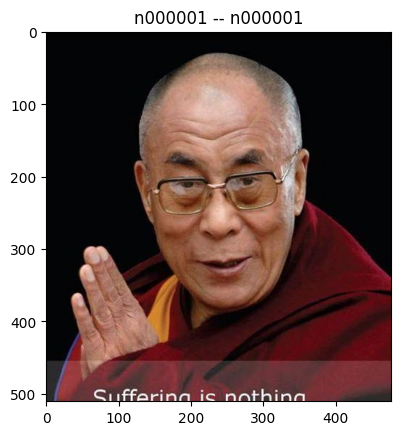

In [ ]:
image = cv2.imread(train_df['image_path'][1])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(f"{train_df['label'][1]} -- {train_df['label'][1]}")
plt.imshow(image_rgb)
plt.show()

In [ ]:
number_class=train_df.num_classes = train_df['label_'].nunique()

In [ ]:
IMAGE_SIZE = (299, 299)
BATCH_SIZE = 64
EPOCHS = 25

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))

for layer in base_model.layers:
    layer.trainable = False


x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(number_class, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=output_layer)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),#0.0001
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,962,460 (91.41 MB)

 Trainable params: 2,159,676 (8.24 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
print(train_df['label_'].unique())
print(len(train_df['label_'].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
60


(np.float64(-0.5), np.float64(635.5), np.float64(582.5), np.float64(-0.5))

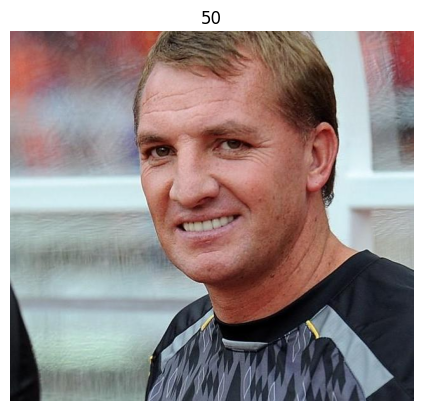

In [ ]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, len(train_df)-1)
img = plt.imread(train_df.iloc[idx]['image_path'])
plt.imshow(img)
plt.title(train_df.iloc[idx]['label_'])
plt.axis('off')

In [ ]:
from sklearn.model_selection import train_test_split

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    zoom_range=0.15,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    rescale=1./255
)

# For validation data, typically only rescaling is needed, no augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Split the combined train_df into training and validation sets
# Using stratify ensures that each class is represented proportionally in both sets
train_df_split, val_df_split = train_test_split(
    train_df,
    test_size=0.2, # 20% for validation
    stratify=train_df['label_'],
    random_state=42
)

print(f"Training set size: {len(train_df_split)} images")
print(f"Validation set size: {len(val_df_split)} images")

# Convert label_ column to string type as required by flow_from_dataframe for sparse class_mode
train_df_split['label_'] = train_df_split['label_'].astype(str)
val_df_split['label_'] = val_df_split['label_'].astype(str)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df_split,
    x_col='image_path',
    y_col='label_',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=True
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df_split,
    x_col='image_path',
    y_col='label_',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False # No need to shuffle validation data
)


history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator # Pass validation generator here
)

Training set size: 2400 images
Validation set size: 600 images
Found 2400 validated image filenames belonging to 60 classes.
Found 600 validated image filenames belonging to 60 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 917s 24s/step - accuracy: 0.0272 - loss: 4.1890 - val_accuracy: 0.1450 - val_loss: 3.6509
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 910s 24s/step - accuracy: 0.0941 - loss: 3.6664 - val_accuracy: 0.2517 - val_loss: 3.3059
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 910s 24s/step - accuracy: 0.1684 - loss: 3.3332 - val_accuracy: 0.2733 - val_loss: 3.0536
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 892s 24s/step - accuracy: 0.2173 - loss: 3.0857 - val_accuracy: 0.3183 - val_loss: 2.8432
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 927s 25s/step - accuracy: 0.2538 - loss: 2.8696 - val_accuracy: 0.3433 - val_loss: 2.6689
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 932s 25s/step - accuracy: 0.2749 - loss: 2.7187 - val_accuracy: 0.3767 - val_loss: 2.5269
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 912s 24s/step - accuracy: 0.3147 - loss: 2.5568 - val_accuracy: 0.4033 - val_loss: 2.4266
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 893s 24s/step - accuracy: 0.3267 - loss: 2.4882 - val_accuracy: 0.

In [ ]:
def predict_top_k(image_path, model, class_idx, k=3):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    import numpy as np


    img = load_img(image_path, target_size=IMAGE_SIZE)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)


    pred = model.predict(img_array)[0]


    top_indices = pred.argsort()[-k:][::-1]


    inv_class_idx = {v:k for k,v in class_idx.items()}


    top_predictions = [(inv_class_idx[i], pred[i]) for i in top_indices]

    return top_predictions


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/train.zip"
extract_dir = "/content/data2/train"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(os.listdir(extract_dir))


['train']


In [ ]:
"""
import zipfile
import os

zip_path = "/content/drive/MyDrive/train-20251212T212831Z-1-001 - Copy.zip"
extract_dir = "/content/train_images"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(os.listdir(extract_dir))
"""

In [ ]:
train_folder = os.path.join(extract_dir, 'train')
print(os.listdir(train_folder))


['n000093', 'n000161', 'n000174', 'n000408', 'n000189', 'n000396', 'n000348', 'n000069', 'n000499', 'n000234', 'n000220', 'n000169', 'n000190', 'n000168', 'n000188', 'n000054', 'n000281', 'n000314', 'n000192', 'n000297', 'n000034', 'n000271', 'n000235', 'n000266', 'n000494', 'n000052', 'n000219', 'n000310', 'n000055', 'n000004', 'n000077', 'n000280', 'n000334', 'n000063', 'n000477', 'n000492', 'n000447', 'n000160', 'n000274', 'n000478', 'n000246', 'n000313', 'n000451', 'n000006', 'n000285', 'n000386', 'n000240', 'n000488', 'n000218', 'n000496', 'n000047', 'n000323', 'n000269', 'n000251', 'n000254', 'n000469', 'n000221', 'n000321', 'n000179', 'n000026', 'n000107', 'n000341', 'n000465', 'n000233', 'n000201', 'n000222', 'n000117', 'n000239', 'n000116', '1Mohmad-Ayman-Suleiman', 'n000187', 'n000278', 'n000175', 'n000270', 'n000390', 'n000351', 'n000120', 'n000429', 'n000083', 'n000358', 'n000010', 'n000171', 'n000279', 'n000210', 'n000416', 'n000347', 'n000115', 'n000003', 'n000369', 'n000

In [ ]:

first_class = os.listdir(train_folder)[0]
first_class_path = os.path.join(train_folder, first_class)


image_path = os.path.join(first_class_path, os.listdir(first_class_path)[0])

print("Image path:", image_path)


Image path: /content/data2/train/train/n000093/0121_01.jpg


In [ ]:
"""
print(uploaded.keys())
# مثال: dict_keys(['WhatsApp Image 2025-12-09 at 2.00.36 PM.jpeg'])
"""


dict_keys(['train-20251212T212831Z-1-001.zip'])


In [ ]:
"""
image_path = "/content/data2/val/n000838/IMG-0001.jpg"
"""


In [ ]:
"""import os
print(os.path.isfile(image_path))  # لازم ترجع True
"""


False


In [ ]:
top_preds = predict_top_k(image_path, model, class_idx, k=3)

print("Top 3 predictions with probabilities:")
for label, prob in top_preds:
    print(f"{label}: {prob*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Top 3 predictions with probabilities:
n000149: 39.97%
n001021: 31.09%
n000363: 9.52%


In [ ]:
"""
image_path = "/content/WhatsApp Image 2025-12-09 at 2.00.36 PM.jpeg"
top_preds = predict_top_k(image_path, model, class_idx, k=3)

print("Top 3 predictions with probabilities:")
for label, prob in top_preds:
    print(f"{label}: {prob*100:.2f}%")
    """

In [ ]:

train_df.to_csv(
    "/content/drive/MyDrive/vggface_train_100x50.csv",
    index=False
)

print("Saved: vggface_train_100x50.csv")


Saved: vggface_train_100x50.csv


In [ ]:
"""
model.save('Shouk_model_V1_c50_s50_ac72.h5')
"""